In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import openpyxl
import os
from sklearn import linear_model
#导入线性模型和多项式特征构造模块
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit 

In [2]:
def loaddata(file):
    points = []
    import_path = 'process_data/' + file
    wb = openpyxl.load_workbook(import_path)
    ws = wb.active
    datatmp = []
    for i in range(1,ws.max_row+1):
        rowtmp = []
        for j in range(1,ws.max_column+1):
            try:
                celltmp=float(ws.cell(row = i, column = j).value)
                rowtmp.append(celltmp)
            except:
                rowtmp.append(0)
                continue
        points.append(rowtmp)
    return np.array(points)

In [3]:
points = loaddata('表面张力计算.xlsx')

Cs = points[0]; Vs = points[3]

yvals is :
 [73.34581979 68.71167346 64.5597885  57.50727569 51.84625135 47.30216935
 43.65465258 40.72680518 36.49016007]


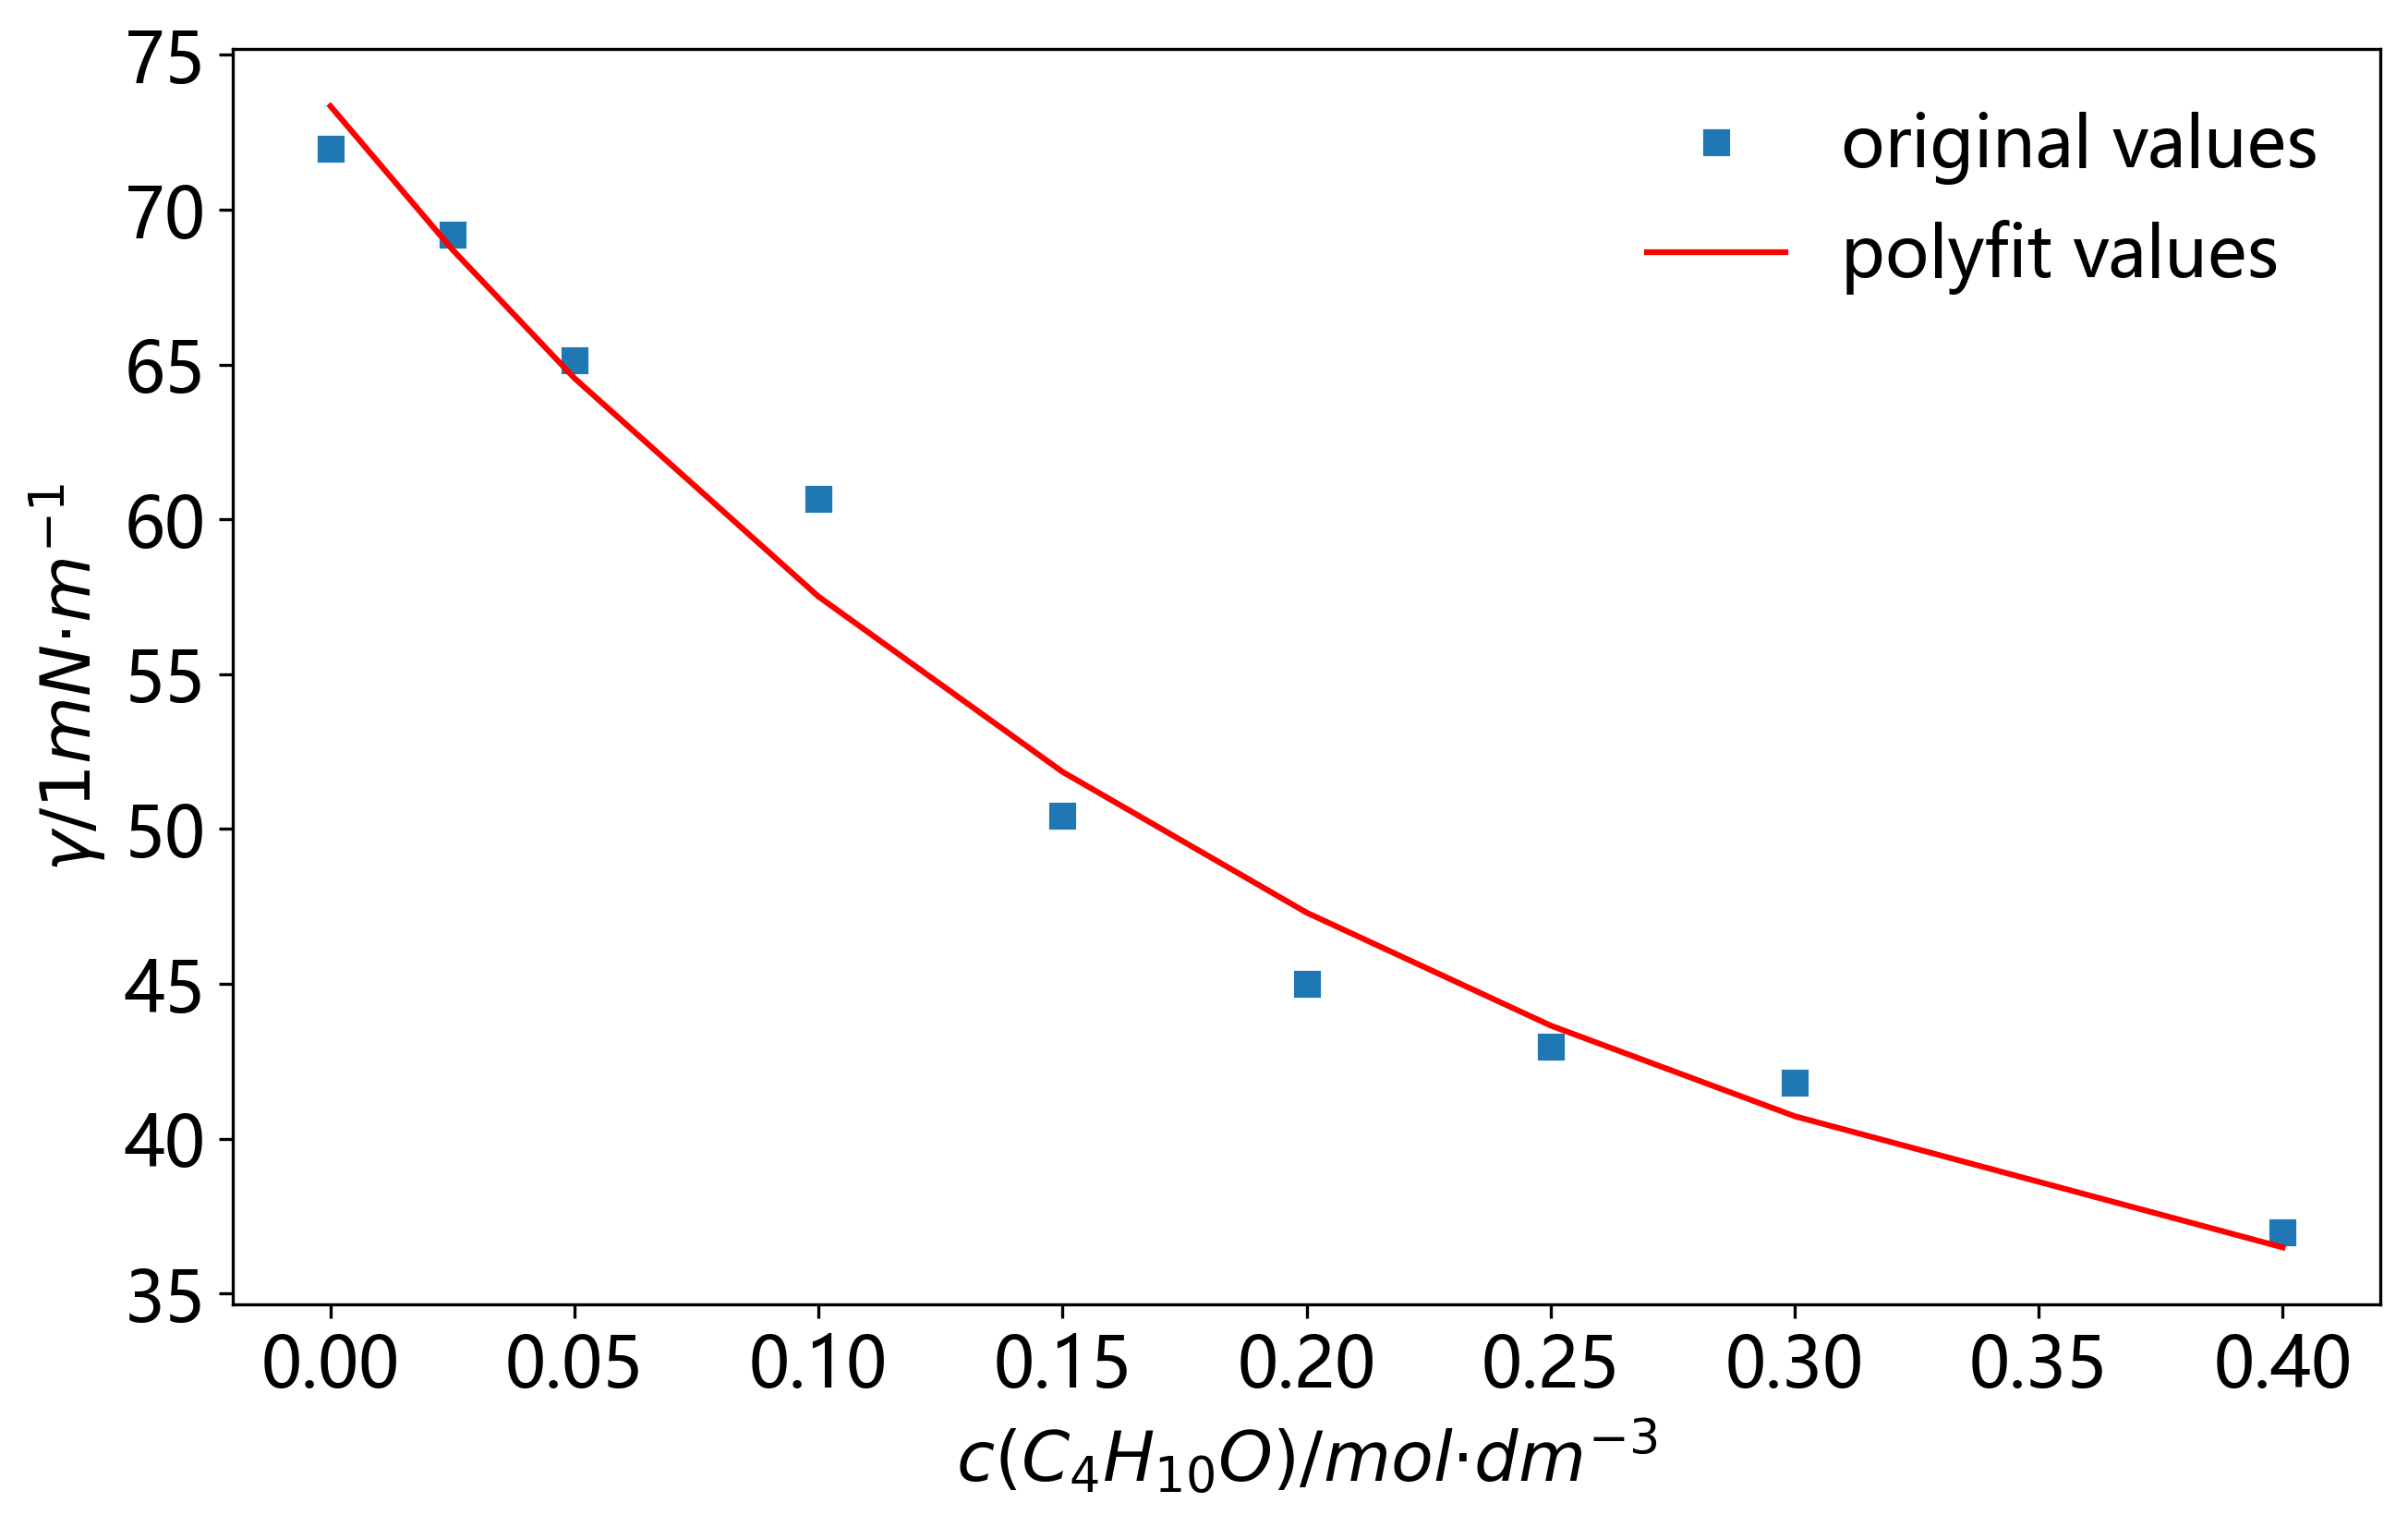

In [11]:
#定义x、y散点坐标
x = Cs; y = Vs

def func(x, a, b, c):
    return a * np.exp(-b * x) + c
def func_d(x, a, b, c):
    return -a * b * np.exp(-b * x)


popt, pcov = curve_fit(func, x, y)

yvals = func(x, *popt)  #拟合y值
print('yvals is :\n',yvals)
#绘图
plt.rcParams['figure.figsize'] = (10.0, 6.0) # 设置figure_size尺寸
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['font.size'] = 18 #字体大小
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel(r'$c(C_4H_{10}O)/mol·dm^{-3}$')
plt.ylabel(r'$\gamma/1mN·m^{-1}$')
plt.legend(loc=1,framealpha=0) #指定legend的位置右上角
plt.savefig('polyfit',bbox_inches='tight')

In [5]:
cs = np.linspace(0.05, 0.4, num=50, endpoint=True, retstep=False, dtype=None)

ydvals = func_d(cs, *popt)  #拟合y_d值

R = 8.314; T = 298
Zs = []; Gammas = []; c_Gammas = []
for i in range(len(cs)):
    c = cs[i]
    Z = - c * ydvals[i] * 0.001
    Gamma = Z/(R*T)
    Zs.append(Z); Gammas.append(Gamma)
    c_Gammas.append(c/Gamma)

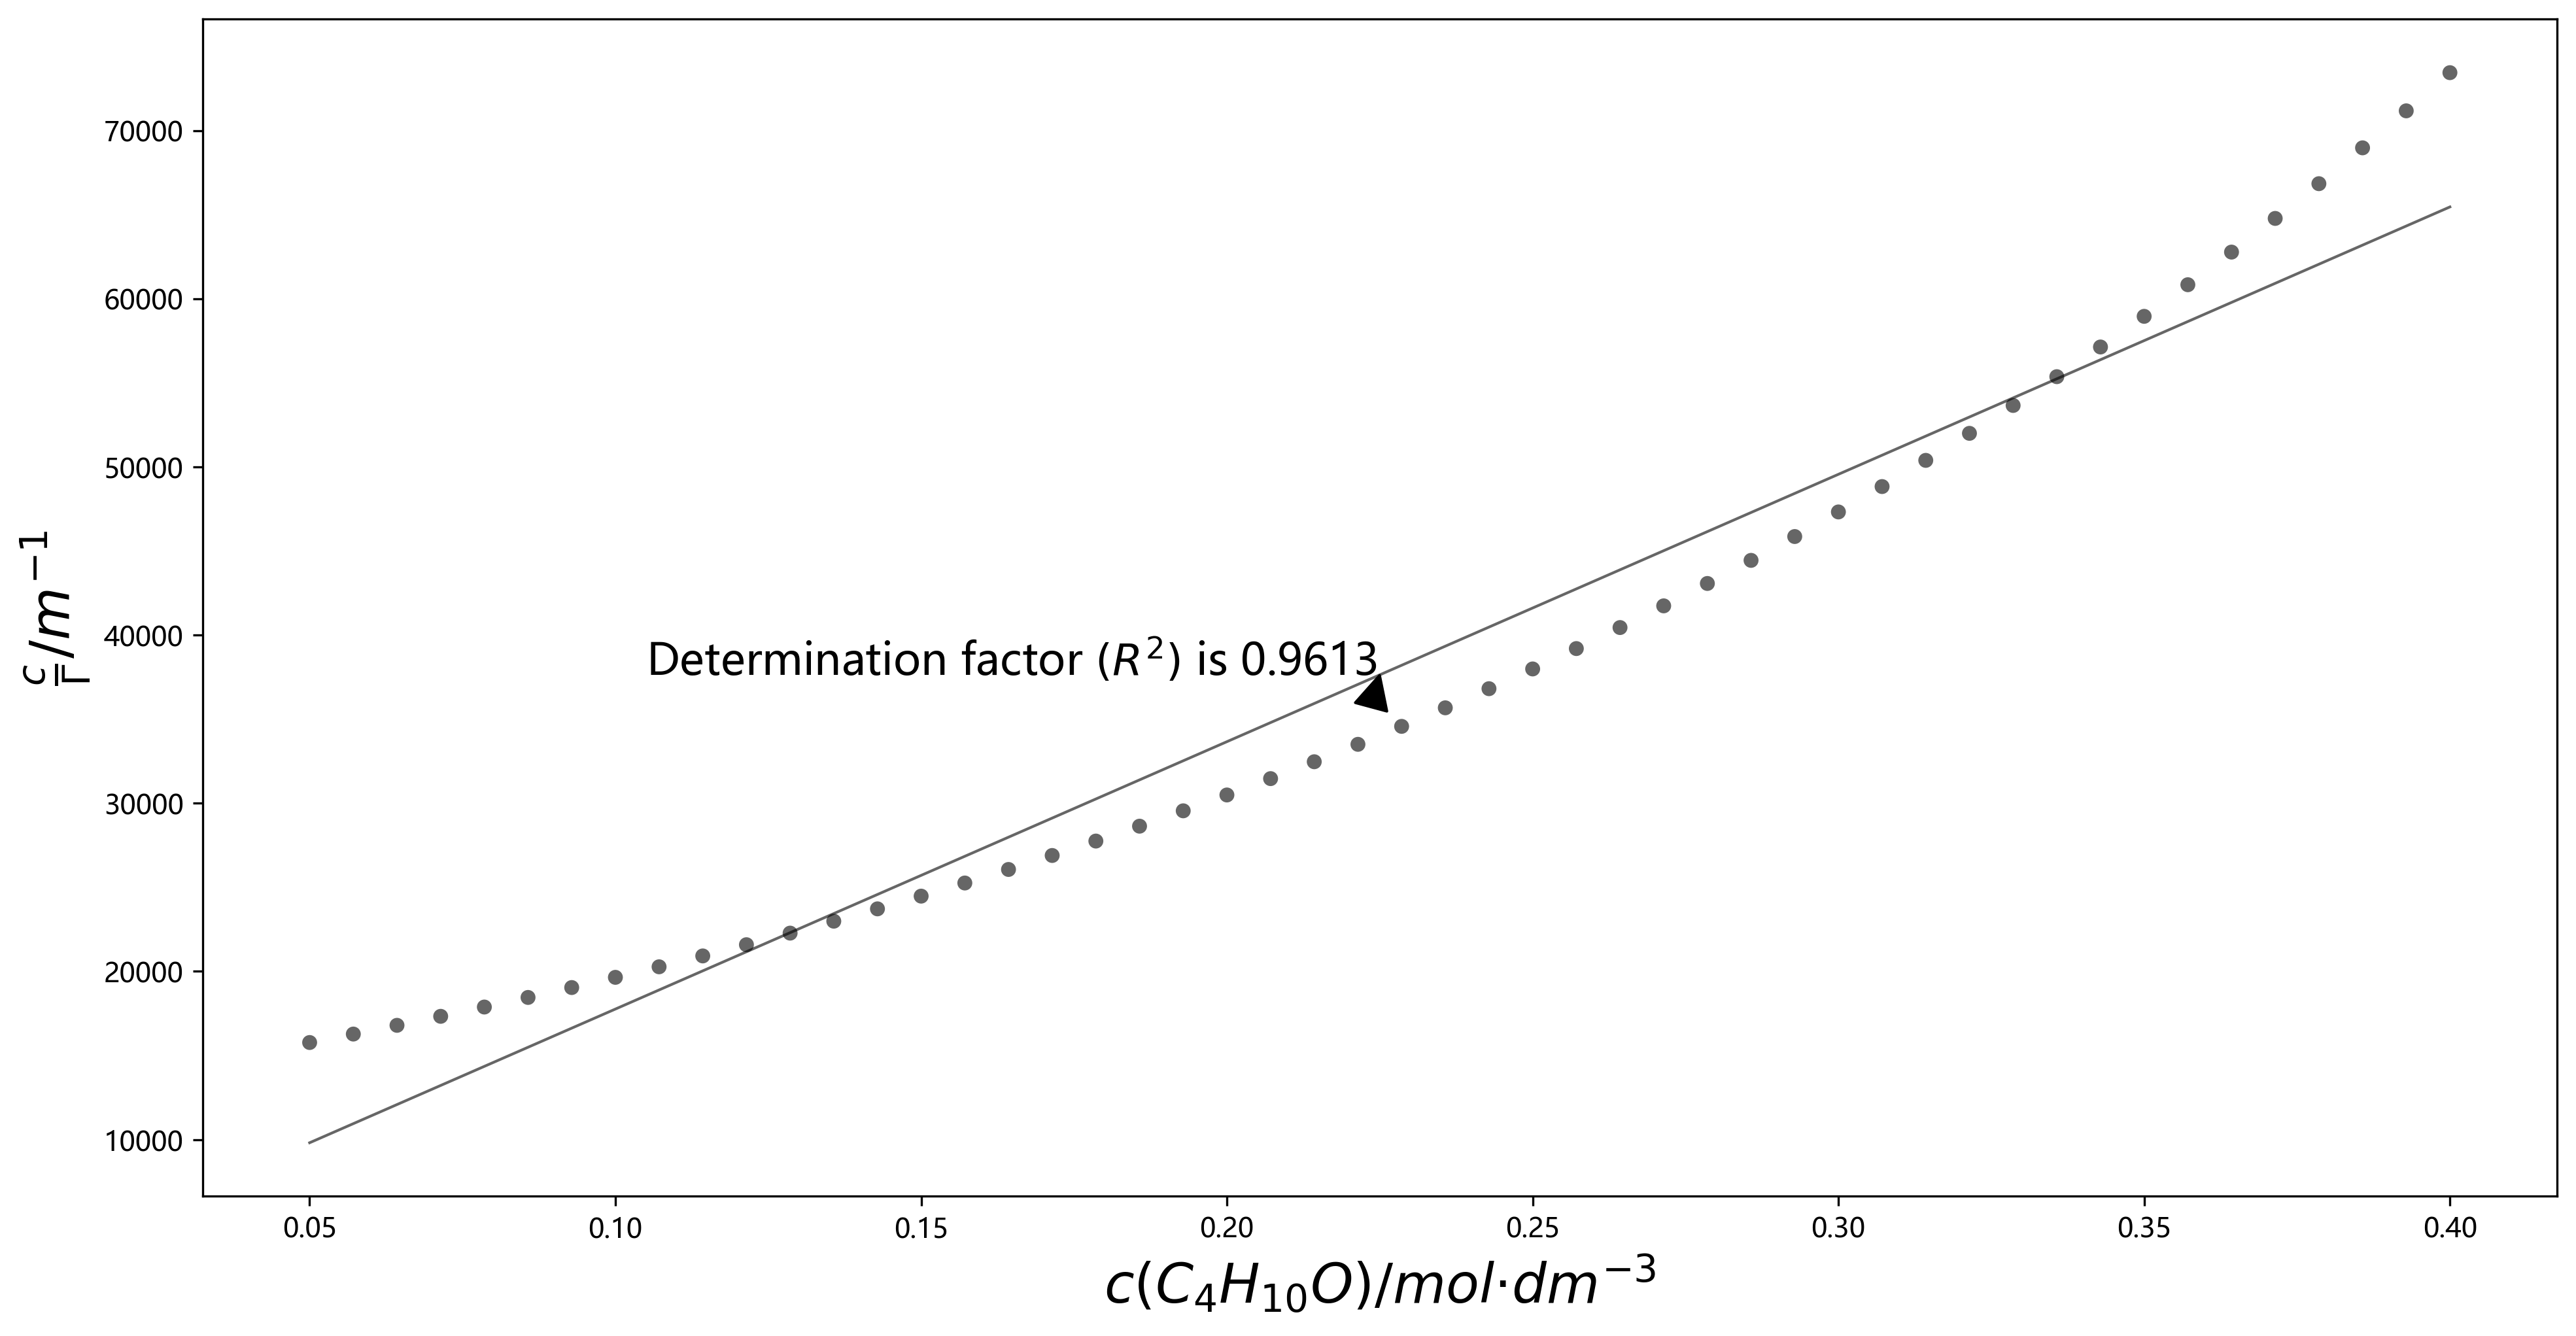

In [6]:
c_Gammas = np.array(c_Gammas); cs = np.array(cs)

left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
rect = [left*0, bottom, width, height]; rect_text = [left + width*0.55, bottom+height*0.7]
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes(rect)

lr = LinearRegression()
minmax_point = ax.scatter(cs, c_Gammas, c='k', s=30, alpha=0.6, edgecolors='none')
c_Gammas = c_Gammas.reshape(-1, 1); cs = cs.reshape(-1,1)

lr.fit(cs,c_Gammas) # 训练模型
R2 = lr.score(cs,c_Gammas) # 计算 R2
left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
rect_text = [left + width*0.55, bottom+height*0.6]
text = 'Determination factor '+r'$(R^2)$' +' is ' + str(format(R2, '.4f'))
ax.annotate(text, xy=(np.average(cs), np.average(c_Gammas)), xytext=(np.average(cs)-0.12, np.average(c_Gammas)+0.1),color='k',fontsize=16, arrowprops=dict(facecolor='k', shrink=0.05))
length = np.max(cs) - np.min(cs)

c_Gammas_hat = lr.predict(cs) # 计算 c_Gammas_hat
ax.plot(cs, c_Gammas_hat, c='k', alpha =0.6, linewidth=1)
plt.xlabel(r'$c(C_4H_{10}O)/mol·dm^{-3}$',fontsize=20)
plt.ylabel(r'$\frac{c}{\Gamma}/m^{-1}$',fontsize=20)

plt.savefig('c_gamma_c',bbox_inches='tight')

In [7]:
k = (np.max(c_Gammas_hat) - np.min(c_Gammas_hat))/(np.max(cs) - np.min(cs))
print(1/k)
print(k)

6.289408074825183e-06
158997.47450045933
